In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from opt import generate_exclusion_list
sns.set_context('paper', font_scale=1.5)

# Experiment 1

In [2]:
proc_data = pd.read_pickle('data/exp1_data.pkl')

# exclude! ...
ex_measures = generate_exclusion_list(proc_data, training_contexts=5, goal_chance=1/3., 
                                   return_measures=True)


100%|██████████| 149/149 [01:42<00:00,  1.57it/s]


N clusters = 2, Covarainace = diag


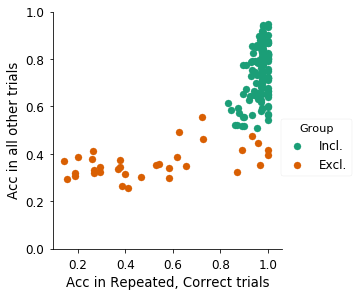

In [3]:
# plot the raw clusters

g = sns.FacetGrid(ex_measures, hue="Group", palette='Dark2', size=4.2)
g.map(plt.scatter, 'Accuracy in Repeated Trials', 'Accuracy in Non-Repeated Trials' ,
      s=50,)
g.add_legend()
g.fig.axes[0].set_ylim([0, 1])
g.set_xlabels('Acc in Repeated, Correct trials')
g.set_ylabels('Acc in all other trials')
plt.savefig('fig_s1a.png', dpi=300, bbox_inches='tight')

In [4]:
q_data = pd.read_pickle('data/exp1_q_data.pkl')
q_data['Group'] = ex_measures.Group.copy()

# sub-select the participants that answered all the questions and were included
q_data = q_data.loc[q_data.subj != 'Excl.']

for cols in ['RightDifficulty', 'LeftDifficulty', 'difficulty', 'engagement', 'View Time (ms)']:
    q_data = q_data[q_data.loc[:, cols] != 'DNR'].copy()
    q_data[cols] = np.array(q_data[cols], dtype='float')
    q_data = q_data[~np.isnan(q_data[cols])]

In [5]:
from scipy.stats import ttest_ind

def stars(p):
    if p < 0.0001:
        return "****"
    elif (p < 0.001):
        return "***"
    elif (p < 0.01):
        return "**"
    elif (p < 0.05):
        return "*"
    else:
        return "-"

def plot_compare(measures, var_name, ax, sig_bars=True):
    colors = sns.color_palette('Set2')
    with sns.axes_style('ticks'):
        sns.boxplot(x='Group', y=var_name, data=measures, ax=ax,linewidth=0, 
                    palette=colors)

        # run a t-test on the groups
        t, p = ttest_ind(measures.loc[measures['Group'] == 'Incl.', var_name], 
                         measures.loc[measures['Group'] == 'Excl.', var_name], 
                         equal_var=False)
        # calculate the degrees of freedom
        s2_i = np.var(measures.loc[measures['Group'] == 'Incl.', var_name])
        s2_e = np.var(measures.loc[measures['Group'] == 'Excl.', var_name])
        n_i = len(measures.loc[measures['Group'] == 'Incl.', var_name])
        n_e = len(measures.loc[measures['Group'] == 'Excl.', var_name])
        
        s_tot = (s2_i / n_i) + (s2_e / n_e)
        
        df = s_tot**2 / (((s2_i/n_i)**2)/(n_i-1) + ((s2_e/n_e)**2)/(n_e-1))
        print '%s, p=%g, t(%.1f)=%g' % (var_name, p, df,  t)

        if sig_bars:
            y_min = measures[var_name].min()
            y_max = measures[var_name].max()
            ax.text(0.5, y_max + abs(y_max - y_min)*0.1, stars(p), size=22,
               horizontalalignment='center', verticalalignment='center')

            ax.annotate("", xy=(0, y_max), xycoords='data', xytext=(1, y_max), textcoords='data', 
                        arrowprops=dict(arrowstyle="-", lw=2.0, ec='#aaaaaa',
                                   connectionstyle="bar,fraction=0.1"))

        for ii in range(6):
            ax.lines[ii].set_linewidth(3)
            ax.lines[ii].set_color(colors[0])

        ax.lines[1].set_ls('--')
        ax.lines[0].set_ls('--')

        for ii in range(6, 12):
            ax.lines[ii].set_linewidth(3)
            ax.lines[ii].set_color(colors[1])

        ax.lines[6].set_ls('--')
        ax.lines[7].set_ls('--')

        ax.lines[10].set_color('k')
        ax.lines[10].set_linewidth(5)
        ax.lines[4].set_color('k')
        ax.lines[4].set_linewidth(5)
        ax.lines[0].set_color(colors[0])


Chose Closet Goal, p=8.69171e-09, t(42.8)=-7.13481
difficulty, p=8.7219e-05, t(47.6)=-4.29358
View Time (ms), p=0.00107346, t(45.1)=3.49852


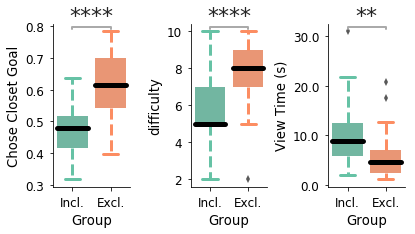

In [6]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'wspace': 0.8}, figsize=(6.3, 3))
plot_compare(ex_measures, u'Chose Closet Goal', ax[0])
plot_compare(q_data, u'difficulty',             ax[1])
plot_compare(q_data, u'View Time (ms)',         ax[2])
y_ticks = ax[2].get_yticks()
ax[2].set_yticklabels(np.array(y_ticks) / 1000.)
ax[2].set_ylabel('View Time (s)')

sns.despine()
plt.savefig('fig_s1b.png', bbox_inches='tight', dpi=300)

Completion Time, p=0.571207, t(36.7)=0.571443
RightDifficulty, p=0.682703, t(40.3)=0.411777
LeftDifficulty, p=0.527009, t(51.7)=-0.636946
engagement, p=0.106542, t(43.6)=1.64834


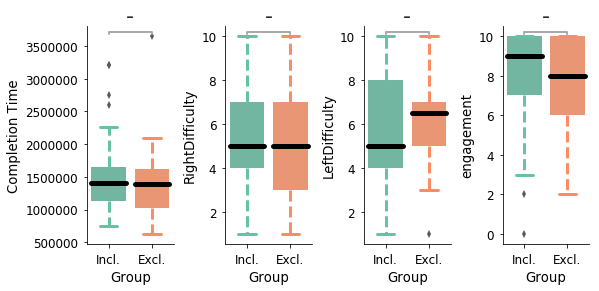

In [7]:
fig, ax = plt.subplots(1, 4, gridspec_kw={'wspace': 0.6}, figsize=(9, 4))
plot_compare(q_data, u'Completion Time', ax[0])
plot_compare(q_data, u'RightDifficulty', ax[1])
plot_compare(q_data, u'LeftDifficulty',  ax[2])
plot_compare(q_data, u'engagement',      ax[3])
sns.despine()
plt.savefig('fig_s1c.png', bbox_inches='tight', dpi=300)

# Experiment 2

In [8]:
proc_data = pd.read_pickle('data/exp2_data.pkl')

# exclude! ...
ex_measures = generate_exclusion_list(proc_data, training_contexts=7, goal_chance=1/4., 
                                   return_measures=True)



100%|██████████| 148/148 [01:39<00:00,  1.51it/s]


N clusters = 2, Covarainace = diag


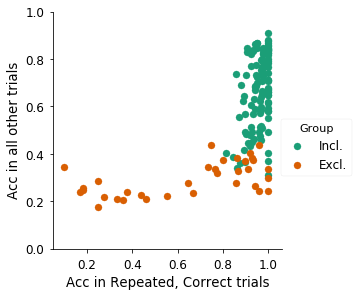

In [9]:
# plot the raw clusters

g = sns.FacetGrid(ex_measures, hue="Group", palette='Dark2', size=4.2)
g.map(plt.scatter, 'Accuracy in Repeated Trials', 'Accuracy in Non-Repeated Trials' ,
      s=50,)
g.add_legend()
g.fig.axes[0].set_ylim([0, 1])
g.set_xlabels('Acc in Repeated, Correct trials')
g.set_ylabels('Acc in all other trials')
plt.savefig('fig_s1c.png', dpi=300, bbox_inches='tight')

In [10]:
q_data = pd.read_pickle('data/exp3_q_data.pkl')
q_data['Group'] = ex_measures.Group.copy()

# sub-select the participants that answered all the questions and were included
# q_data = q_data.loc[q_data.subj != 'Excluded']  

for cols in ['RightDifficulty', 'LeftDifficulty', 'difficulty', 'engagement', 'View Time (ms)']:
    q_data = q_data[q_data.loc[:, cols] != 'DNR'].copy()
    q_data[cols] = np.array(q_data[cols], dtype='float')
    q_data = q_data[~np.isnan(q_data[cols])]

Chose Closet Goal, p=2.50634e-08, t(65.8)=-6.3378
difficulty, p=0.446424, t(53.3)=0.76712
View Time (ms), p=0.764431, t(57.7)=0.301101


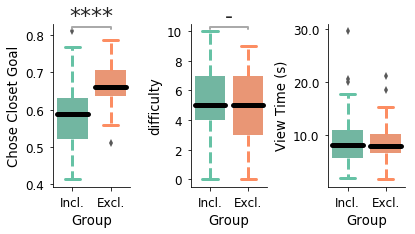

In [11]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'wspace': 0.8}, figsize=(6.3, 3))
plot_compare(ex_measures, u'Chose Closet Goal', ax[0])
plot_compare(q_data, u'difficulty',             ax[1])
plot_compare(q_data, u'View Time (ms)',         ax[2], sig_bars=False)
y_ticks = ax[2].get_yticks()
ax[2].set_yticklabels(np.array(y_ticks) / 1000.)
ax[2].set_ylabel('View Time (s)')

sns.despine()
plt.savefig('fig_s1d.png', dpi=300, bbox_inches='tight')

Completion Time, p=0.694969, t(48.8)=0.394463
RightDifficulty, p=0.816317, t(51.7)=-0.23348
LeftDifficulty, p=0.0695562, t(58.0)=1.84935
engagement, p=0.862921, t(62.7)=-0.173376


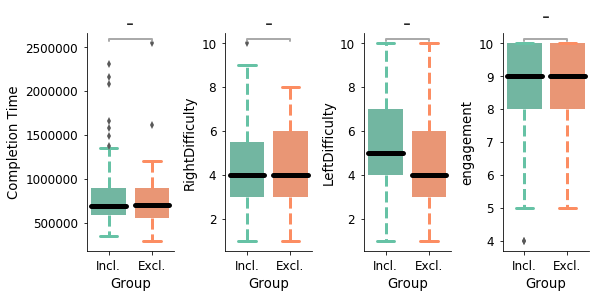

In [12]:
fig, ax = plt.subplots(1, 4, gridspec_kw={'wspace': 0.6}, figsize=(9, 4))
plot_compare(q_data, u'Completion Time', ax[0])
plot_compare(q_data, u'RightDifficulty', ax[1])
plot_compare(q_data, u'LeftDifficulty',  ax[2])
plot_compare(q_data, u'engagement',      ax[3])
sns.despine()

# Experiment 3

In [13]:
proc_data = pd.read_pickle('data/exp3_data.pkl')

# exclude! ...
ex_measures = generate_exclusion_list(proc_data, training_contexts=3, binom=False,
                                   return_measures=True)




100%|██████████| 196/196 [00:41<00:00,  4.22it/s]


N clusters = 2, Covarainace = diag


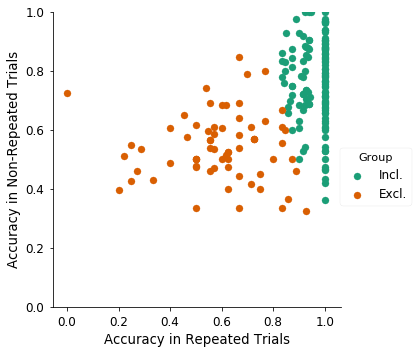

In [15]:
# plot the raw clusters

g = sns.FacetGrid(ex_measures, hue="Group", palette='Dark2', size=5)
g.map(plt.scatter, 'Accuracy in Repeated Trials', 'Accuracy in Non-Repeated Trials' ,
      s=50,)
g.add_legend()
g.fig.axes[0].set_ylim([0, 1])
plt.savefig('fig_s1e.png', dpi=300, bbox_inches='tight')

In [16]:
q_data = pd.read_pickle('data/exp3_q_data.pkl')
q_data['Group'] = ex_measures.Group.copy()

# sub-select the participants that answered all the questions and were included
q_data = q_data.loc[q_data.subj != 'Excluded']

for cols in ['RightDifficulty', 'LeftDifficulty', 'difficulty', 'engagement', 'View Time (ms)']:
    q_data = q_data[q_data.loc[:, cols] != 'DNR'].copy()
    q_data[cols] = np.array(q_data[cols], dtype='float')
    q_data = q_data[~np.isnan(q_data[cols])]

Chose Closet Goal, p=0.0487002, t(115.5)=-1.99234
difficulty, p=0.771547, t(106.5)=-0.291095
View Time (ms), p=0.414259, t(150.6)=0.818695


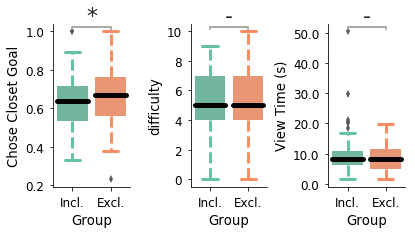

In [19]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'wspace': 0.8}, figsize=(6.3, 3))

plot_compare(ex_measures, u'Chose Closet Goal', ax[0])
plot_compare(q_data, u'difficulty',             ax[1])
plot_compare(q_data, u'View Time (ms)',         ax[2])
y_ticks = ax[2].get_yticks()
ax[2].set_yticklabels(np.array(y_ticks) / 1000.)
ax[2].set_ylabel('View Time (s)')

sns.despine()
plt.savefig('fig_s1f.png', dpi=300, bbox_inches='tight')

Completion Time, p=0.882183, t(141.6)=-0.148471
RightDifficulty, p=0.0812995, t(106.7)=1.75991
LeftDifficulty, p=0.800971, t(96.0)=-0.252793
engagement, p=0.740592, t(101.4)=0.33198


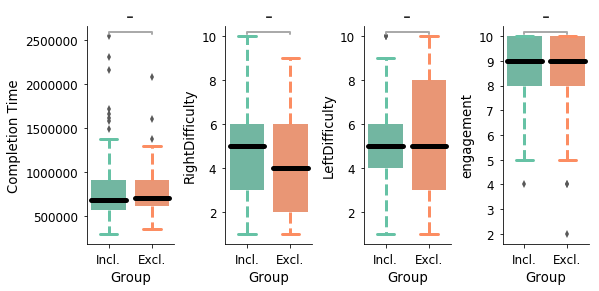

In [20]:
fig, ax = plt.subplots(1, 4, gridspec_kw={'wspace': 0.6}, figsize=(9, 4))
plot_compare(q_data, u'Completion Time', ax[0])
plot_compare(q_data, u'RightDifficulty', ax[1])
plot_compare(q_data, u'LeftDifficulty',  ax[2])
plot_compare(q_data, u'engagement',      ax[3])
sns.despine()